In [1]:
# This cell just makes sure the library paths are correct. 
# You need to run this cell before you run the rest of this
# tutorial, but you can ignore the contents!
import os
import sys
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)


Data exploration for the SRL Validation dataset.


In [2]:
import numpy
import json
from matplotlib import pyplot
import seaborn
import pandas

# Load json
all_data = json.load(open("validation_stats.json", "r"))
print(all_data[0])




{'tokens': ['Lebanon', ',', 'Iraq', 'and', 'other', 'hot', 'issues', 'were', 'for', 'the', 'most', 'part', 'the', 'gist', 'of', 'the', 'call', 'with', 'which', 'the', 'Gulf', 'leaders', 'concluded', 'their', '27th', 'summit', 'in', 'Riyadh', '.'], 'per_element_loss': [4.76837158203125e-06, 3.814697265625e-06, 1.1444091796875e-05, 9.5367431640625e-07, 1.9073486328125e-06, 1.9073486328125e-06, 3.62396240234375e-05, -0.0, 0.006137847900390625, 0.0209810733795166, 0.02230679988861084, 0.08491945266723633, 0.015977859497070312, 3.337860107421875e-06, 1.9073486328125e-06, 1.9073486328125e-06, 3.337860107421875e-06, 2.6226043701171875e-06, 5.7220458984375e-06, 1.9073486328125e-06, 1.9073486328125e-06, 4.76837158203125e-06, 2.384185791015625e-06, 4.291534423828125e-06, 2.384185791015625e-06, 1.430511474609375e-06, -0.0, -0.0, -0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

## Sequence level NLL Histogram

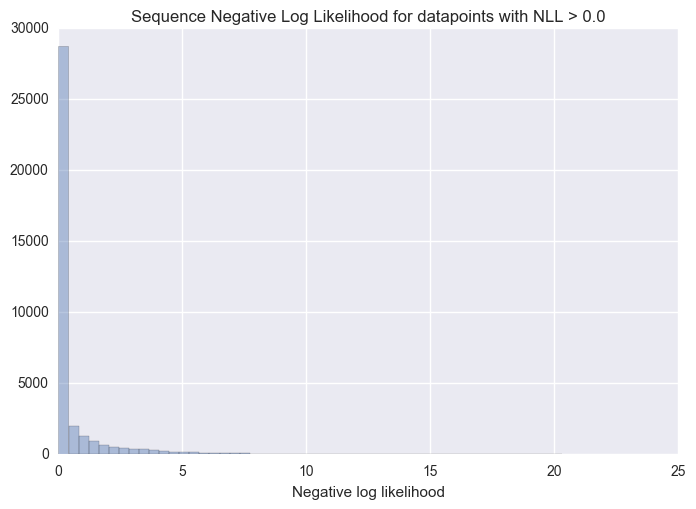

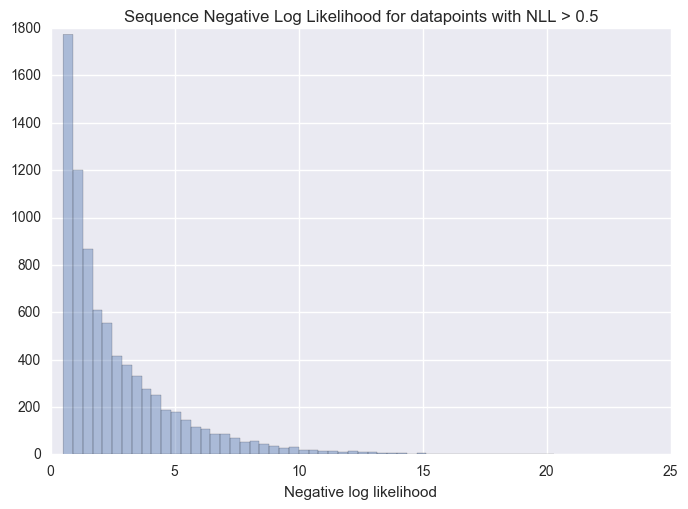

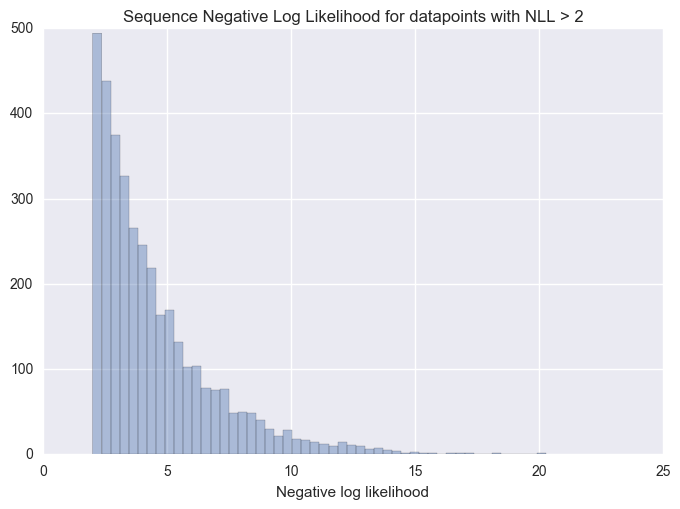

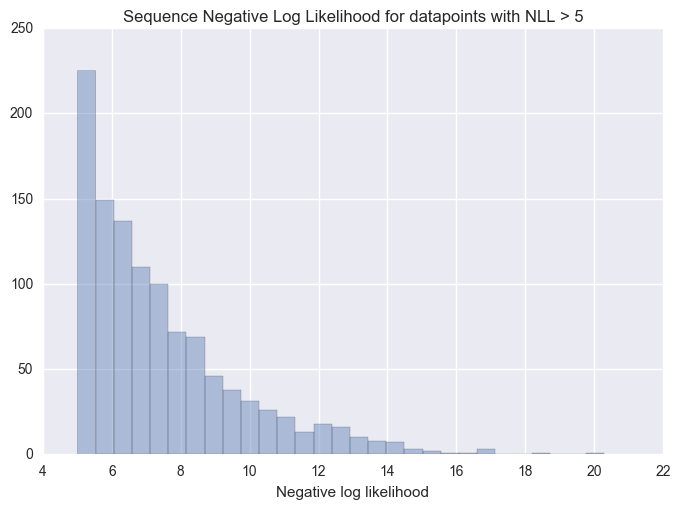

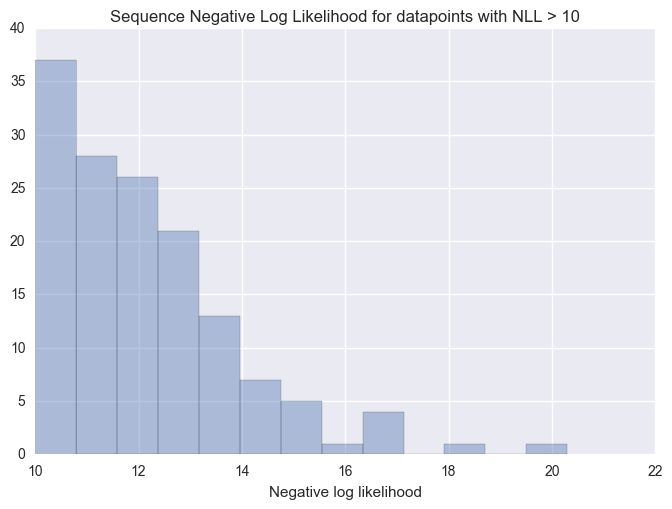

In [3]:
def sequence_level_histogram(exclude_below):
    nll_values = [x["sequence_loss"] for x in all_data if x["sequence_loss"] > exclude_below]
    histogram = seaborn.distplot(nll_values, kde=False, axlabel="Negative log likelihood")
    histogram.set_title("Sequence Negative Log Likelihood for datapoints with NLL > {}".format(exclude_below))
    pyplot.show()

sequence_level_histogram(0.0)
sequence_level_histogram(0.5)
sequence_level_histogram(2)
sequence_level_histogram(5)
sequence_level_histogram(10)

#### Ok, so there's some data points which have > 15 NLL. Let's look at what the tags are for these.

In [4]:
for datapoint in all_data:
    if datapoint["sequence_loss"] > 15:
        print("Words: \n", " ".join(datapoint["tokens"]))
        print("Gold: \n", " ".join(datapoint["gold_tags"]))
        print("Predicted: \n", " ".join(datapoint["tags"]), "\n")
        print("================================================================", "\n")
        

Words: 
 The battle of the editorials reflects what many political analysts predict will be one of the closest Presidential races in decades .
Gold: 
 B-ARG1 I-ARG1 I-ARG1 I-ARG1 I-ARG1 B-V B-ARG2 I-ARG2 I-ARG2 I-ARG2 I-ARG2 I-ARG2 I-ARG2 I-ARG2 I-ARG2 I-ARG2 I-ARG2 I-ARG2 I-ARG2 I-ARG2 I-ARG2 O
Predicted: 
 B-ARG2 I-ARG2 I-ARG2 I-ARG2 I-ARG2 B-V B-ARG1 I-ARG1 I-ARG1 I-ARG1 I-ARG1 I-ARG1 I-ARG1 I-ARG1 I-ARG1 I-ARG1 I-ARG1 I-ARG1 I-ARG1 I-ARG1 I-ARG1 O 


Words: 
 This circle operates mostly through mosques , madrasas and other religious establishments but also through inciting electronic and printed media .
Gold: 
 B-ARG1 I-ARG1 B-V B-ARG4 I-ARG4 I-ARG4 I-ARG4 I-ARG4 I-ARG4 I-ARG4 I-ARG4 I-ARG4 I-ARG4 I-ARG4 I-ARG4 I-ARG4 I-ARG4 I-ARG4 I-ARG4 I-ARG4 O
Predicted: 
 B-ARG1 I-ARG1 B-V B-ARGM-MNR I-ARGM-MNR I-ARGM-MNR I-ARGM-MNR I-ARGM-MNR I-ARGM-MNR I-ARGM-MNR I-ARGM-MNR I-ARGM-MNR I-ARGM-MNR I-ARGM-MNR I-ARGM-MNR I-ARGM-MNR I-ARGM-MNR I-ARGM-MNR I-ARGM-MNR I-ARGM-MNR O 


Words: 
 These 

### Scatter plot of average negative log likelihood by length of sentence.

Ok, so not at all corellated by length. 

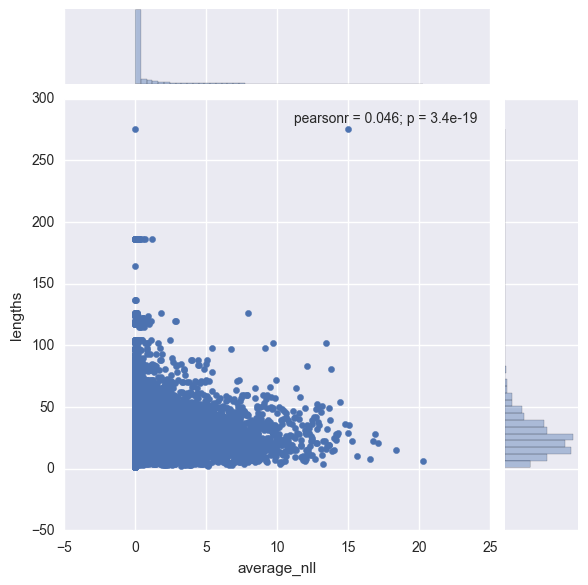

In [5]:
nll_values = [x["sequence_loss"] for x in all_data]
lengths = [len(x["tokens"]) for x in all_data]

data = pandas.DataFrame({"lengths": lengths, "average_nll": nll_values})
joint_plot = seaborn.jointplot(x="average_nll", y="lengths", data=data)
pyplot.show()


### Number of correct tags vs NLL - are they corelated?

Sample Size:  1598


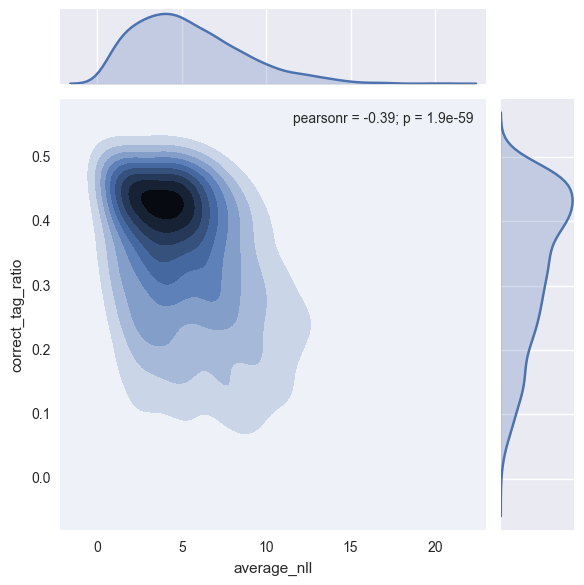

In [11]:

nll_values = []
correct_tag_ratio = []

for datapoint in all_data:
    
    gold = datapoint["gold_tags"]
    predicted = datapoint["tags"]
    num_correct = sum([1 if x == y else 0 for x, y in zip(gold, predicted)])
    ratio = num_correct/len(gold)
    if ratio < 0.5:
        nll_values.append(datapoint["sequence_loss"])
        correct_tag_ratio.append(ratio)
    
print("Sample Size: ", len(nll_values))
data = pandas.DataFrame({"correct_tag_ratio": correct_tag_ratio, "average_nll": nll_values})
joint_plot = seaborn.jointplot(x="average_nll", y="correct_tag_ratio", data=data, kind="kde")
pyplot.show()

### There are some examples with a very low number of correct tags, but low (relatively) NLL. What are they?

- Lists are hard.
- Most have complex punctuation.

In [12]:
# Note: Running this with total NLL shows some results which have obviously incorrect labels.

def filter_by_incorrect_tags_and_nll(max_correct_tag_ratio, max_avg_nll):

    for datapoint in all_data:
        gold = datapoint["gold_tags"]
        predicted = datapoint["tags"]
        num_correct = sum([1 if x == y else 0 for x, y in zip(gold, predicted)])
        ratio = num_correct/len(gold)
    
        if ratio < max_correct_tag_ratio and datapoint["sequence_loss"] < max_avg_nll:
            print("Words: \n", " ".join(datapoint["tokens"]))
            print("Gold: \n", " ".join(datapoint["gold_tags"]))
            print("Predicted: \n", " ".join(datapoint["tags"]), "\n")
            print("================================================================", "\n")

            
filter_by_incorrect_tags_and_nll(0.2, 2)

Words: 
 Tied for second are television talk show hostess Oprah Winfrey and former British Prime Minister Margaret Thatcher , both with 4 % .
Gold: 
 O O O B-V O O O O O O O O O O O O O O O O O O O
Predicted: 
 B-ARG1 I-ARG1 I-ARG1 B-V B-ARG2 I-ARG2 I-ARG2 I-ARG2 I-ARG2 I-ARG2 I-ARG2 I-ARG2 I-ARG2 I-ARG2 I-ARG2 I-ARG2 I-ARG2 I-ARG2 I-ARG2 I-ARG2 I-ARG2 I-ARG2 O 


Words: 
 Mr. Clinton is expected to admit when he gave sworn testimony in August 1998 , he knowingly misled investigators looking into the Paula Jones and Monica Lewinsky matters .
Gold: 
 O O O B-V B-ARG1 I-ARG1 I-ARG1 I-ARG1 I-ARG1 I-ARG1 I-ARG1 I-ARG1 I-ARG1 I-ARG1 I-ARG1 I-ARG1 I-ARG1 I-ARG1 I-ARG1 I-ARG1 I-ARG1 I-ARG1 I-ARG1 I-ARG1 I-ARG1 I-ARG1 I-ARG1 I-ARG1 O
Predicted: 
 O O O B-V B-C-ARG1 I-C-ARG1 I-C-ARG1 I-C-ARG1 I-C-ARG1 I-C-ARG1 I-C-ARG1 I-C-ARG1 I-C-ARG1 I-C-ARG1 O O O O O O O O O O O O O O O 


Words: 
 These men were traveling with him : Sopater , the son of Pyrrhus , from the city of Berea ; Aristarchus and S

### Per tag analysis - are we very confident on particular tags?

Number of outliers excluded:  46


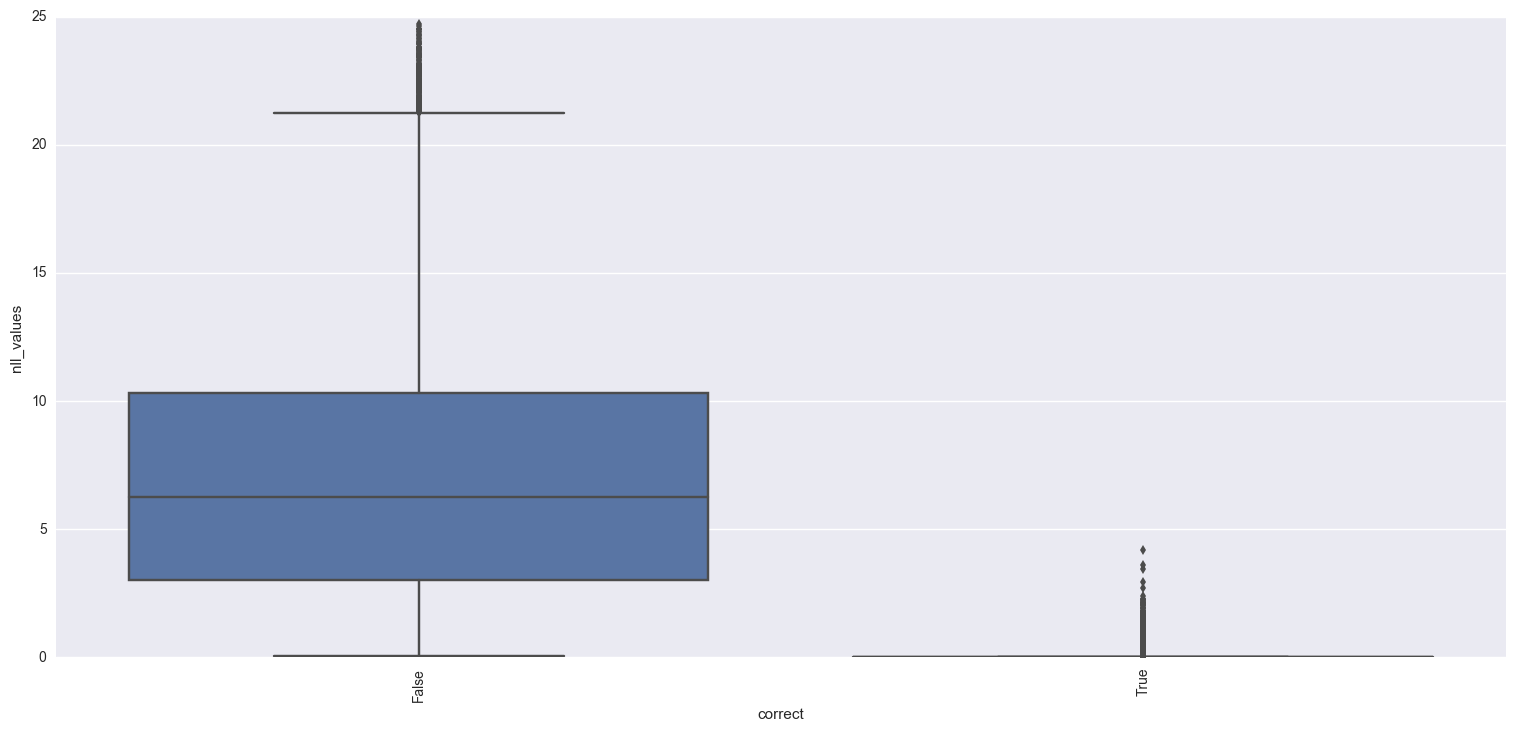

In [16]:

conll_tags = []
bio_tags = []
correct_tags = []
nll_values = []

outliers = 0
for datapoint in all_data:
    gold = datapoint["gold_tags"]
    predicted = datapoint["tags"]
    sequence_nll = datapoint["per_element_loss"]
    for i, tag in enumerate(predicted):
        
        if sequence_nll[i] < 25:
            bio_tag = tag[0]
            conll_tag = tag[2:]
            correct = tag == gold[i]
            conll_tags.append(conll_tag)
            bio_tags.append(bio_tag)
            correct_tags.append(correct)
            nll_values.append(sequence_nll[i])
        else:
            outliers +=1
print("Number of outliers excluded: ", outliers)


fig, ax = pyplot.subplots()
# the size of A4 paper
fig.set_size_inches(18.7, 8.27)

data = pandas.DataFrame({"conll_tags": conll_tags, "nll_values": nll_values,
                         "correct": correct_tags, "bio_tag": bio_tags})

violin_plot = seaborn.boxplot(x="correct", y="nll_values", data=data)
pyplot.xticks(rotation=90)
pyplot.show()


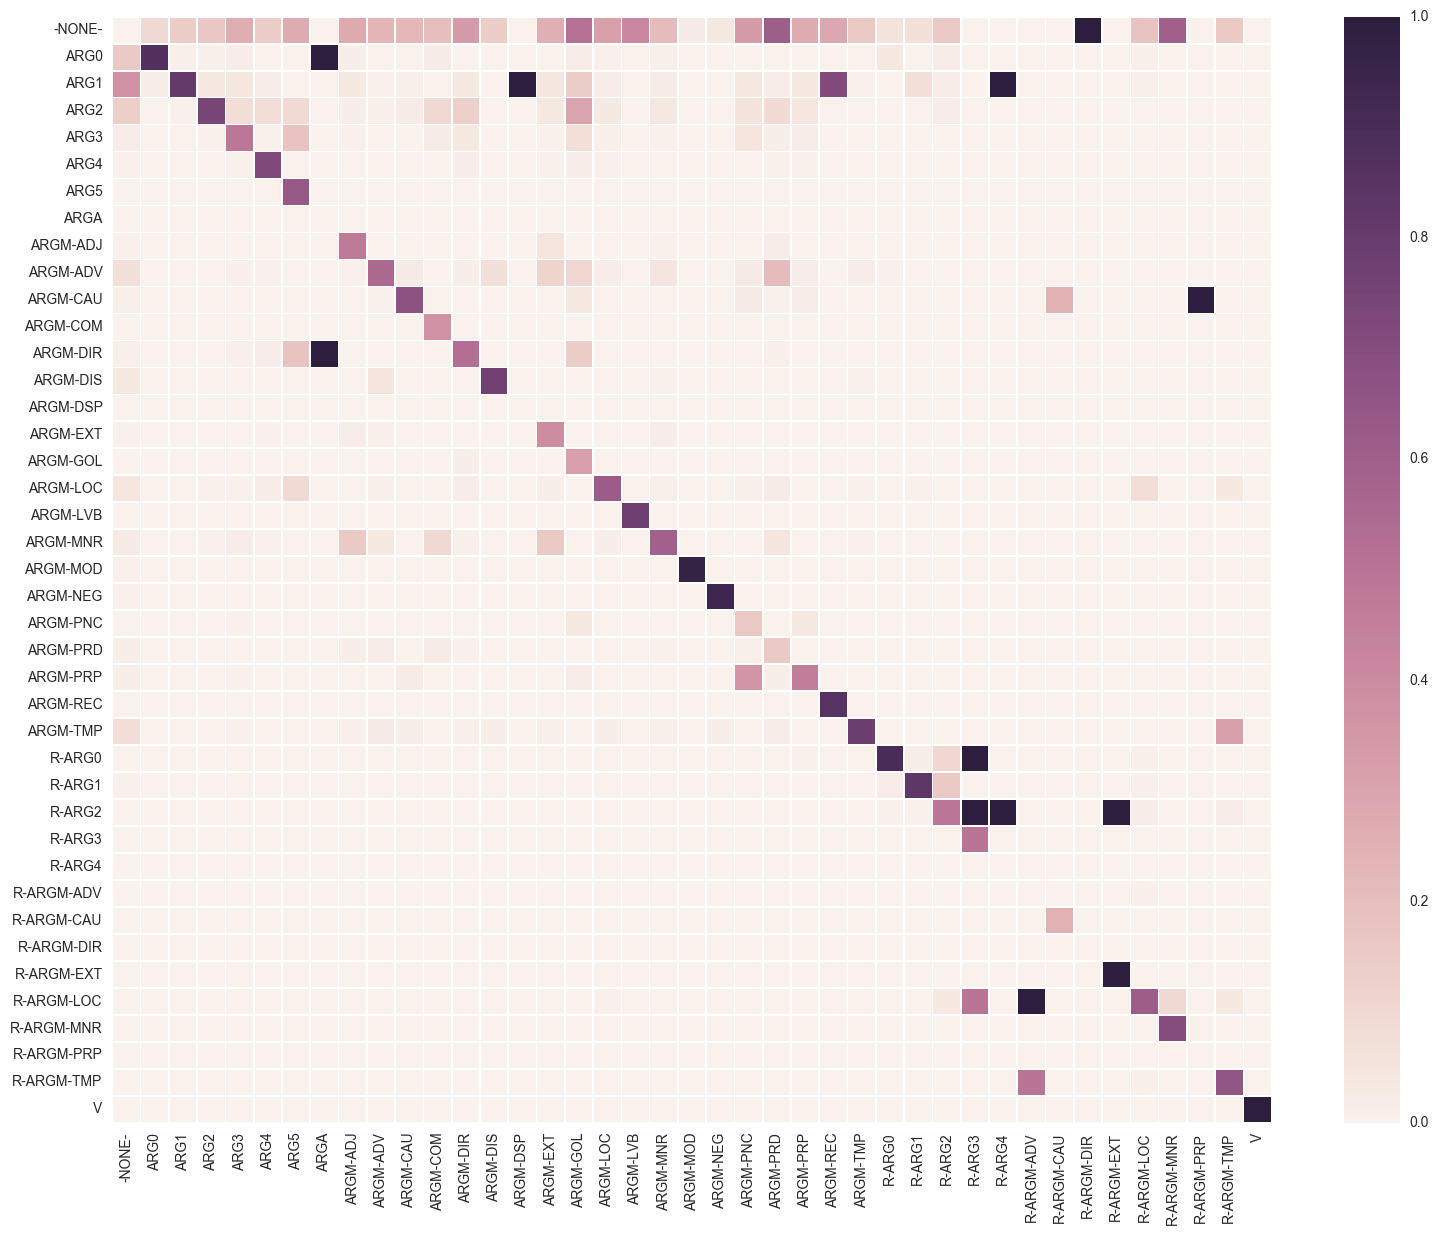

In [9]:

with open("confusion.txt", "r") as confusion:
    
    values = []
    labels = []
    for line in confusion:
        all_values = line.split()
        values.append(all_values[1:])
        labels.append(all_values[0])

values_array = numpy.array(values).astype("float64")

fig, ax = pyplot.subplots()
# the size of A4 paper
fig.set_size_inches(18.7, 14.27)

percentages = numpy.nan_to_num(values_array/ (values_array.sum(1) + 1e-13))

confusion_matrix = seaborn.heatmap(percentages,
                                   linewidths=0.5,
                                   xticklabels=labels,
                                   yticklabels=labels,
                                   cbar=True,
                                   vmin=0.0,
                                   vmax=1.0)
pyplot.show()






